# Test simulation resampling

## Imports

In [1]:
import sys
import os
import pprint
import cPickle as pickle
from functools import partial
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
gleam_root = "/Users/phdenzel/gleam"
sys.path.append(gleam_root)
from gleam.utils.lensing import LensModel
from gleam.lensobject import LensObject
from gleam.reconsrc import ReconSrc
from gleam.utils.plotting import IPColorbar, IPPointCache
from gleam.utils.plotting import plot_scalebar, plot_labelbox
import gleam.utils.colors as gcl
gcl.GLEAMcmaps.register_all()
# from gleam.glass_interface import glass_renv
# glass = glass_renv()

## Load lensing data and models

In [2]:
ids = ['SDSSJ0029-0055', 'SDSSJ0737+3216', 'SDSSJ0753+3416', 'SDSSJ0956+5100',
       'SDSSJ1051+4439', 'SDSSJ1430+6104', 'SDSSJ1627-0053']
jsons = !ls data/*.json
obs = {k:v for k, v in zip(ids, jsons)}
pkls = !ls models/*.pkl
mdls = {k:v for k, v in zip(ids, pkls)}
pprint.pprint(obs)
print
pprint.pprint(mdls)

{'SDSSJ0029-0055': 'data/SDSSJ0029-0055.json',
 'SDSSJ0737+3216': 'data/SDSSJ0737+3216.json',
 'SDSSJ0753+3416': 'data/SDSSJ0753+3416.json',
 'SDSSJ0956+5100': 'data/SDSSJ0956+5100.json',
 'SDSSJ1051+4439': 'data/SDSSJ1051+4439.json',
 'SDSSJ1430+6104': 'data/SDSSJ1430+6104.json',
 'SDSSJ1627-0053': 'data/SDSSJ1627-0053.json'}

{'SDSSJ0029-0055': 'models/SDSSJ0029-0055_kappa_re0.97_zl0.23zs0.93.pkl',
 'SDSSJ0737+3216': 'models/SDSSJ0737+3216_kappa_re1.03_zl0.32zs0.58.pkl',
 'SDSSJ0753+3416': 'models/SDSSJ0753+3416_kappa_re1.31_zl0.14zs0.96.pkl',
 'SDSSJ0956+5100': 'models/SDSSJ0956+5100_kappa_re1.40_zl0.24zs0.47.pkl',
 'SDSSJ1051+4439': 'models/SDSSJ1051+4439_kappa_re1.50_zl0.16zs0.54.pkl',
 'SDSSJ1430+6104': 'models/SDSSJ1430+6104_kappa_re1.15_zl0.17zs0.65.pkl',
 'SDSSJ1627-0053': 'models/SDSSJ1627-0053_kappa_re1.27_zl0.21zs0.52.pkl'}


In [3]:
objects = []
for k in ids:
    with open(obs[k]) as f:
        l = LensObject.from_json(f)
        objects.append(l)
pprint.pprint(objects)

[LensObject(@[7.2824, -0.9308]),
 LensObject(@[114.3846, 32.2833]),
 LensObject(@[118.4425, 34.2758]),
 LensObject(@[149.1444, 51.0112]),
 LensObject(@[162.7892, 44.6525]),
 LensObject(@[217.6450, 61.0680]),
 LensObject(@[246.9573, -0.8845])]


In [4]:
models = []
for k in ids:
    with open(mdls[k]) as f:
        mdl_pars = pickle.load(f)
        mdl_pars[1].pop('filename')
        lm = LensModel(mdl_pars[0], filename=mdls[k], **mdl_pars[1])
        models.append(lm)
# print(models[0].__v__)

### Rotate maps

In [5]:
for k, lm in zip(ids, models):
    angles = np.array([0]*lm.N)
    angles[0] = 90
    angles[1] = 45
    lm.rotate(angles, data_attr='data')

<IPython.core.display.Javascript object>


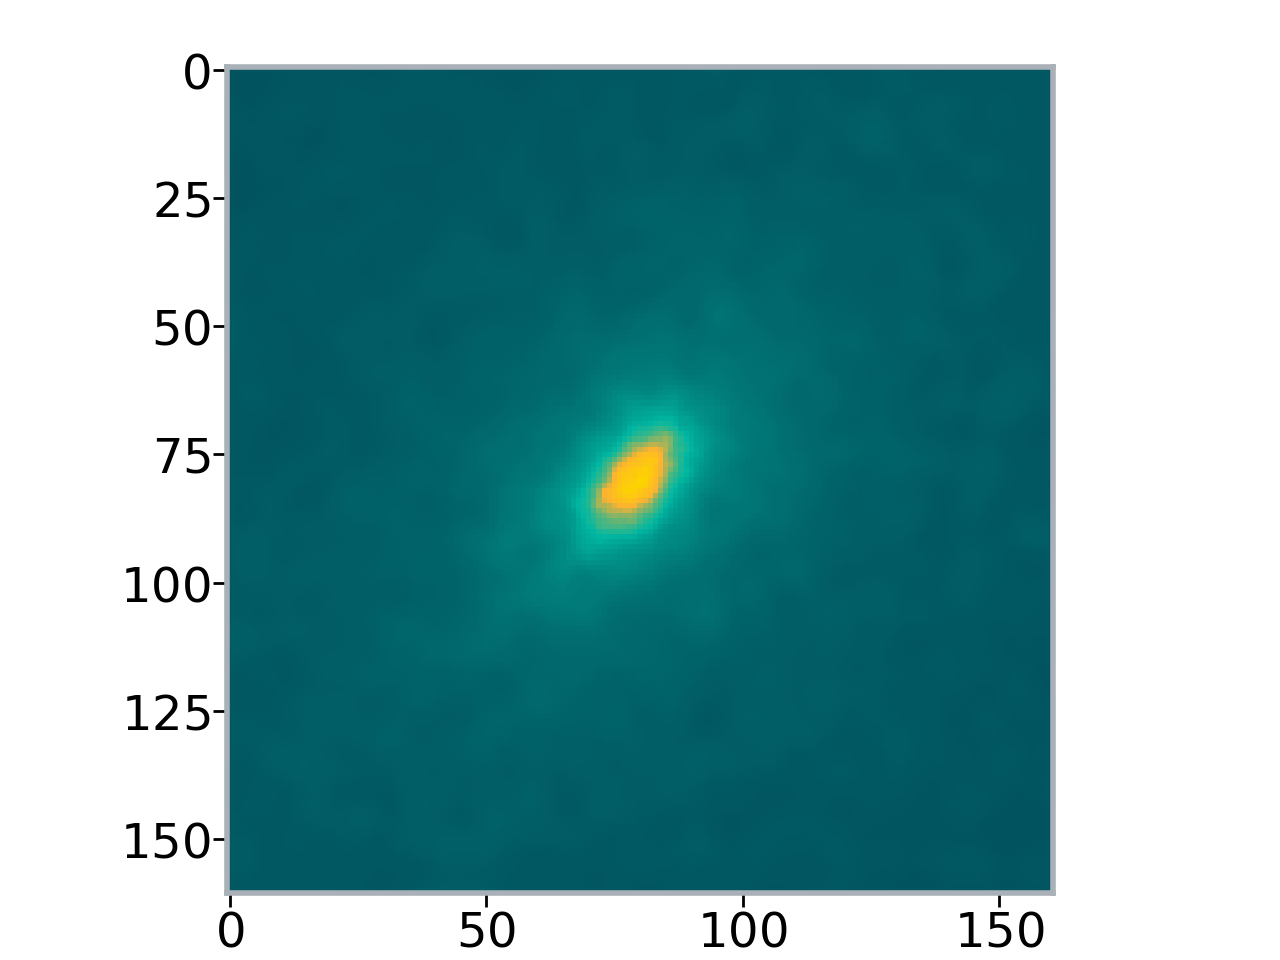

In [6]:
%matplotlib notebook
idx = 0

fig, ax = plt.subplots()
plt_out = plt.imshow(models[0].data[idx], cmap=gcl.GLEAMcmaps.agaveglitch)
plt.show()


<IPython.core.display.Javascript object>


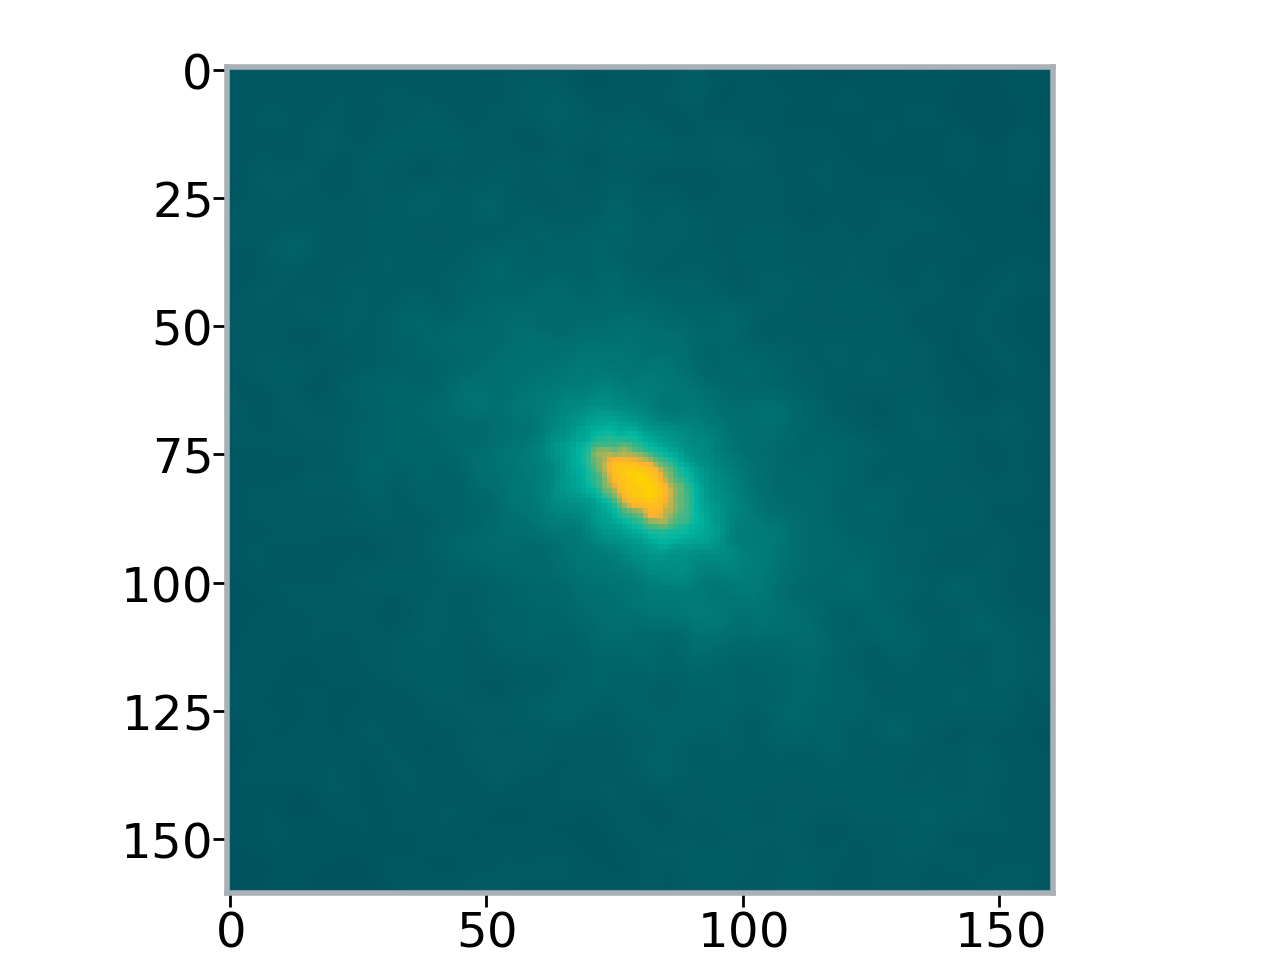

In [7]:
%matplotlib notebook

fig, ax = plt.subplots()
plt_rot = plt.imshow(models[0].rotated['data'][idx], cmap=gcl.GLEAMcmaps.agaveglitch)
plt.show()


### Resample to coarse kappa maps

In [8]:
new_pixrad = 11

rescaled_models = []
for k, lm in zip(ids, models):
    lm.resample(new_pixrad, data_attr='rotated')
    # lm_resc = lm.resample(new_pixrad, data_attr='rotated')
    # kw = {}
    # kw['pixrad'] = new_pixrad
    # kw['maprad'] = lm.maprad
    # zoom_factor = (2*new_pixrad + 1.)/(2*lm.pixrad + 1)
    # data = ndimage.interpolation.zoom(lm.data, [1, zoom_factor, zoom_factor], order=0)
    # lm_resc = LensModel(data, filename="{}_kappa@pixrad{}".format(k, new_pixrad), **kw)
    # rescaled_models.append(lm_resc)

<IPython.core.display.Javascript object>


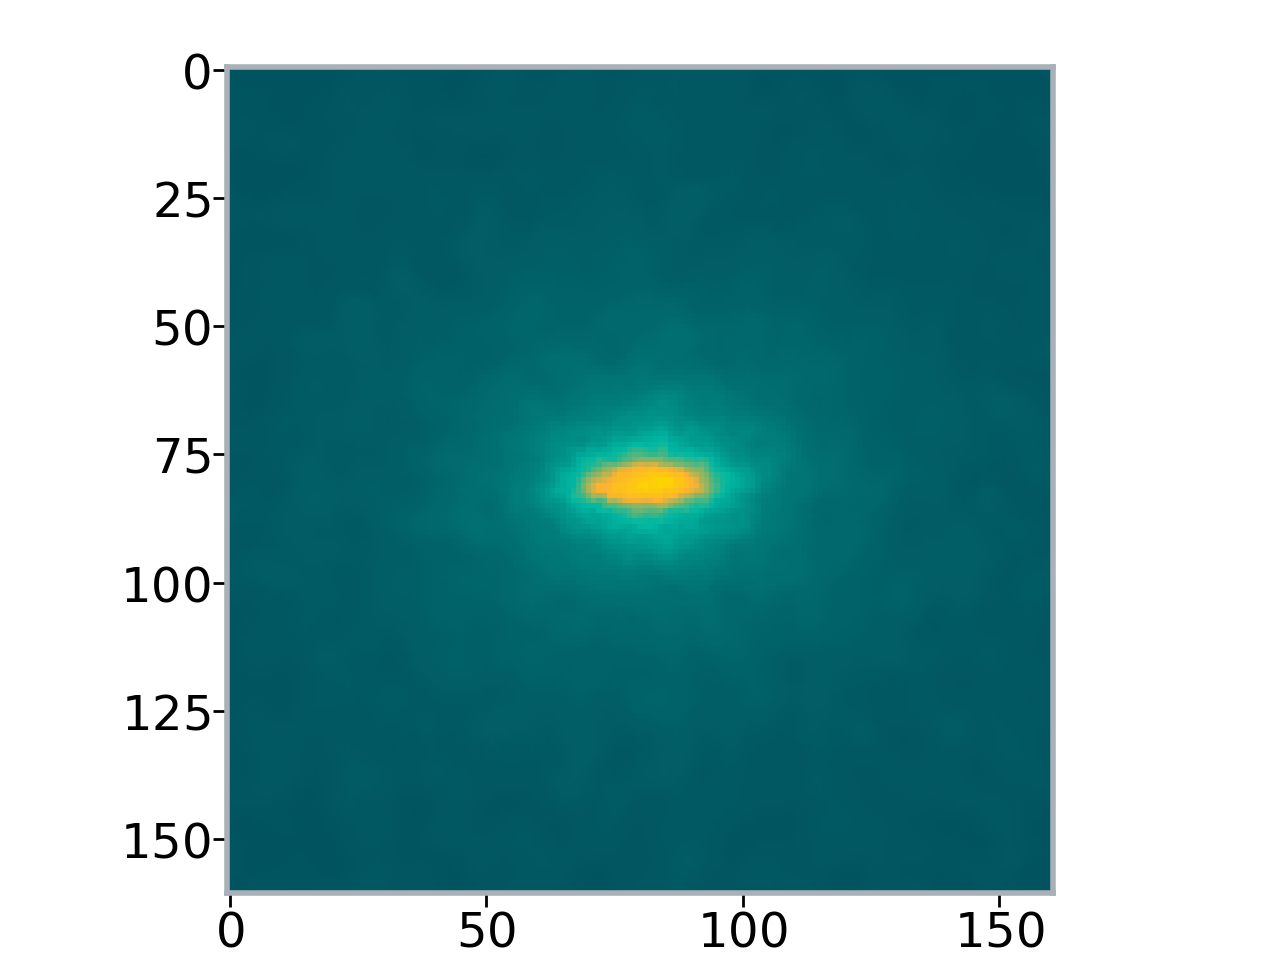

In [15]:
%matplotlib notebook
idx = 3

fig, ax = plt.subplots()
# plt_out = plt.imshow(lm.rotated['data'][idx], cmap=gcl.GLEAMcmaps.agaveglitch)
plt_out = plt.imshow(lm.data[idx], cmap=gcl.GLEAMcmaps.agaveglitch)
plt.show()

<IPython.core.display.Javascript object>


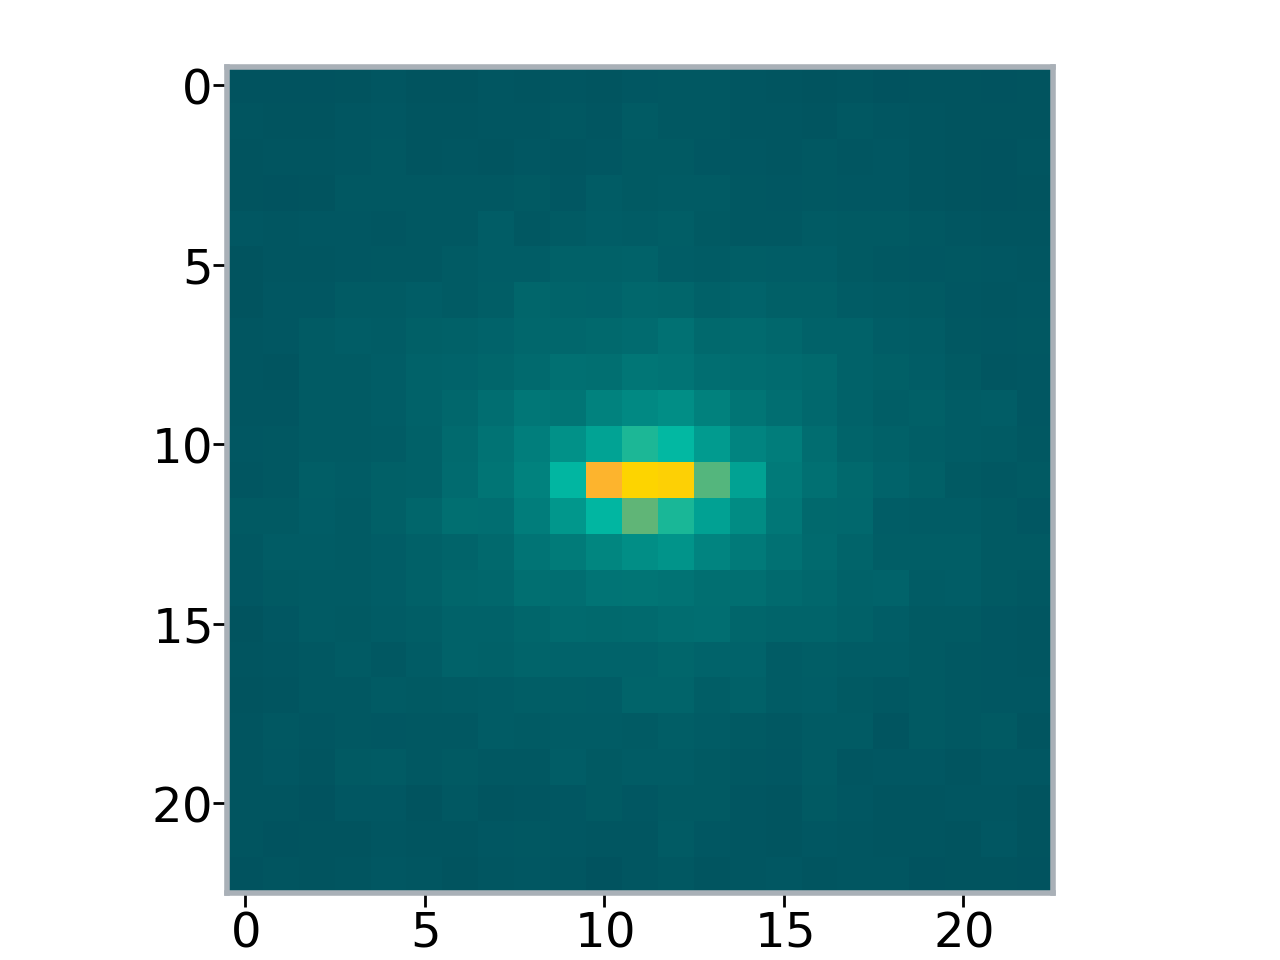

In [16]:
%matplotlib notebook

fig, ax = plt.subplots()
plt_rot = plt.imshow(lm.resampled['data'][idx], cmap=gcl.GLEAMcmaps.agaveglitch)
plt.show()